In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sns

import myLib_barChart as myBar
import myLib_confMatrix as myMatrix
import myLib_parseData as myParse
import myLib_pieChart as myPie
import myLib_table as myTable
import myLib_testModel as myTest
from myLib_testModel import letterToSoftmax
import myLib_writeFile as myWrite
import myLib_debugFiles as myDebug


np.set_printoptions(suppress=True)

In [2]:
# DEfinition of string values for the bold print
S_BOLD = '\033[1m'
E_BOLD = '\033[0m'

# LOAD DATASET AND PREPARE TRAIN - TEST

In this section the functions loadDataFromTxt and parseTrainTest are called. These allow to load the dataset from the txt files into matrices and then separate them in smaller matrices for testing and training. 

In [3]:
vowels_data, vowels_label = myParse.loadDataFromTxt('vowels_OL')
OL_data_train_vow, OL_label_train_vow, OL_data_test_vow, OL_label_test_vow = myParse.parseTrainTest(vowels_data, vowels_label, 0.7)

******* Dataset for letter ['A' 'E' 'I' 'O' 'U']

Raw shape        -> (103600, 5)
Tot samples      -> 518


*** Separate train-valid

Train data shape  -> (361, 600)
Test data shape   -> (155, 600)


In [4]:
B_data, B_label = myParse.loadDataFromTxt('B_dataset')
B_train_data, B_train_label, B_test_data, B_test_label = myParse.parseTrainTest(B_data, B_label, 0.7)

******* Dataset for letter ['B']

Raw shape        -> (39400, 5)
Tot samples      -> 197


*** Separate train-valid

Train data shape  -> (136, 600)
Test data shape   -> (59, 600)


In [5]:
M_data, M_label = myParse.loadDataFromTxt('M_dataset')
M_train_data, M_train_label, M_test_data, M_test_label = myParse.parseTrainTest(M_data, M_label, 0.7)

******* Dataset for letter ['M']

Raw shape        -> (39000, 5)
Tot samples      -> 195


*** Separate train-valid

Train data shape  -> (135, 600)
Test data shape   -> (58, 600)


In [6]:
R_data, R_label = myParse.loadDataFromTxt('R_dataset')
R_train_data, R_train_label, R_test_data, R_test_label = myParse.parseTrainTest(R_data, R_label, 0.7)

******* Dataset for letter ['R']

Raw shape        -> (39000, 5)
Tot samples      -> 195


*** Separate train-valid

Train data shape  -> (135, 600)
Test data shape   -> (58, 600)


###  Create a dataset of all letters

In this smaller section all the previous matrices are stacked together and then shuffled in order to create two big matrices that contain all the letters for training and testing. The training dataset is also shuffled, in order to shuffle it differently change the seed value inside the function myParse.shuffleDataset

In [7]:
# Create a matrix that contains all the train data
data_all = OL_data_train_vow
data_all = np.vstack(( data_all, B_train_data))
data_all = np.vstack(( data_all, R_train_data))
data_all = np.vstack(( data_all, M_train_data))
# Create an array that contains all the train labels
label_all = OL_label_train_vow
label_all = np.hstack(( label_all, B_train_label))
label_all = np.hstack(( label_all, R_train_label))
label_all = np.hstack(( label_all, M_train_label))
# Shuffle the matrix and the label
data_all, label_all = myParse.shuffleDataset(data_all, label_all)

print('data_all has shape  ' + str(data_all.shape))
print('label_all has shape ' + str(label_all.shape))

data_all has shape  (767, 600)
label_all has shape (767,)


In [8]:
# Create a matrix that contains all the train data
data_test = OL_data_test_vow
data_test = np.vstack(( data_test, B_test_data))
data_test = np.vstack(( data_test, R_test_data))
data_test = np.vstack(( data_test, M_test_data))
# Create an array that contains all the train labels
label_test = OL_label_test_vow
label_test = np.hstack(( label_test, B_test_label))
label_test = np.hstack(( label_test, R_test_label))
label_test = np.hstack(( label_test, M_test_label))

print('data_test has shape  ' + str(data_test.shape))
print('label_test has shape ' + str(label_test.shape))

data_test has shape  (330, 600)
label_test has shape (330,)


Another method for loading the dataset is to load it from the txt file "training_file". This file is an already shuffled dataset. I can use this for both feeding data in this simulation and also to the STM in order to have the closes behaviour possible.

In [9]:
data, label = myParse.loadDataFromTxt('training_file')
data_train, label_train, data_test, label_test = myParse.parseTrainTest(data, label, 0.7)

******* Dataset for letter ['A' 'B' 'E' 'I' 'M' 'O' 'R' 'U']

Raw shape        -> (220400, 5)
Tot samples      -> 1102


*** Separate train-valid

Train data shape  -> (770, 600)
Test data shape   -> (330, 600)


The class Data_Container is just a container that I created in order to have all the dataset in a single object. This is useful for the plotting functions because it allows me to give as input to the function just one object and not the entire list of datasets.

In [10]:
class Data_Container(object):
    def __init__(self):

        self.R_test_data       = R_test_data
        self.R_test_label      = R_test_label
        self.B_test_data       = B_test_data
        self.B_test_label      = B_test_label
        self.M_test_data       = M_test_data
        self.M_test_label      = M_test_label
        self.R_test_data       = R_test_data
        self.OL_data_test_vow  = OL_data_test_vow
        self.OL_label_test_vow = OL_label_test_vow
        
OL_testing_data = Data_Container()

### Check the content of the dataset

This block is used only to check the type of letters that are inside the datasets that I imported. It's used in order to see if the datasets are created and saved correctly.

In [11]:
print('VOWELS DATASET SANITY CHECK')
myParse.sanityCheckDataset(vowels_label)
print('\nB DATASET SANITY CHECK')
myParse.sanityCheckDataset(B_label)
print('\nR DATASET SANITY CHECK')
myParse.sanityCheckDataset(R_label)
print('\nM DATASET SANITY CHECK')
myParse.sanityCheckDataset(M_label)
print('\nTRAIN DATASET SANITY CHECK')
myParse.sanityCheckDataset(label_train)
print('\nTEST DATASET SANITY CHECK')
myParse.sanityCheckDataset(label_test)

VOWELS DATASET SANITY CHECK
    The letters found are:              ['O', 'U', 'A', 'E', 'I']
    And for each letter the counter is: [103. 103. 103. 103. 103.   1.   0.   0.   0.]

B DATASET SANITY CHECK
    The letters found are:              ['B']
    And for each letter the counter is: [194.   1.   0.   0.   0.   0.   0.   0.   0.]

R DATASET SANITY CHECK
    The letters found are:              ['R']
    And for each letter the counter is: [192.   1.   0.   0.   0.   0.   0.   0.   0.]

M DATASET SANITY CHECK
    The letters found are:              ['M']
    And for each letter the counter is: [192.   1.   0.   0.   0.   0.   0.   0.   0.]

TRAIN DATASET SANITY CHECK
    The letters found are:              ['B', 'I', 'M', 'R', 'E', 'A', 'O', 'U']
    And for each letter the counter is: [131.  75. 137. 139.  70.  71.  75.  71.   1.]

TEST DATASET SANITY CHECK
    The letters found are:              ['E', 'U', 'A', 'B', 'R', 'M', 'O', 'I']
    And for each letter the counter is: [32.

#  ------------------------------------------------------------------------

# LOAD TF TRAINED MODEL

In this section I load the frozen model. The frozen model is the NN that has been trained with keras on the PC. The script that trains this model is called 'run_trainFroznModel.py'

In [12]:
ROOT_PATH = os.path.abspath('')
MODEL_PATH = ROOT_PATH + "/Saved_models/"

In [13]:
model = keras.models.load_model(MODEL_PATH + 'Original_model/model.h5')

#  ------------------------------------------------------------------------

# TINY OL

In this section the main part of the continual learning study is found. Here can be found the functions used for implementing the different algorithms. 

The function below is an implementation of the softmx function. I had to use this because I noticed that the sofmtax function used from keras and other methods for computing the sotmax operation gave different results.

In [14]:
def myFunc_softmax(array):
    """ Computes softmax of an array
    
    Parameters
    ----------
    array : array_like
        Is the array of which I want to compute the softmax operation
    """
    
    if(len(array.shape)==2):
        array = array[0]
        
    size    = len(array)
    ret_ary = np.zeros([len(array)])
    m       = array[0]
    sum_val = 0

    for i in range(0, size):
        if(m<array[i]):
            m = array[i]

    for i in range(0, size):
        sum_val += np.exp(array[i] - m)

    constant = m + np.log(sum_val)
    for i in range(0, size):
        ret_ary[i] = np.exp(array[i] - constant)
        
    return ret_ary


## TinyOL class

This class is just a container for all the informations that are required in order to use correctly a tinyOL model. The idea is to createa  container in which everything is stored and then simply change the method for the training.

In [15]:
class Custom_Layer(object):
    def __init__(self, model):

        # Related to the layer
        self.ML_frozen = keras.models.Sequential(model.layers[:-1])  # extract the last layer from the original model
        self.ML_frozen.compile()
        self.W = np.array(model.layers[-1].get_weights()[0])    # extract the weights from the last layer
        self.b = np.array(model.layers[-1].get_weights()[1])    # extract the biases from the last layer
        self.label = ['A', 'E', 'I', 'O', 'U']                  # the origina model knows only the vowels
        self.l_rate = 0                                         # learning rate that changes depending on the algorithm
        self.W_counter = np.zeros(self.W.shape)
        
        self.width = self.W.shape[0]        # shape of the weights matrix
        
        
        # Related to the results fo the model
        self.confusion_matrix = []          # container for the confusion matrix
        self.correct_ary = []               # array that contains the number of correct prediction for each letter
        self.mistake_ary = []               # array that contains the number of mistaken prediction for each letter
        self.totals_ary = []                # array that contains the number of total prediction for each letter
        
        self.macro_avrg_precision = 0       
        self.macro_avrg_recall = 0
        self.macro_avrg_F1score = 0
        
        self.title = ''       # title that will be displayed on plots
        self.filename = ''    # name of the files to be saved (plots, charts, conf matrix)
        
        
    # Function that is used for the prediction of the model saved in this class
    def predict(self, x):
        mat_prod = np.array(np.matmul(x, self.W) + self.b)
        return  myFunc_softmax(mat_prod) # othwerwise do it with keras|also remove np.array()| tf.nn.softmax(mat_prod) 

## TinyOL functions

This function is used in all methods before the feed forward of the OL layer. This function is required because it checks if the input letter is already known. If this is not true it will increse the dimension of the last layre (weight matrix and biases array) and also save the new letter in the 'known classes' array.

In [16]:
def checkLabelKnown(model, current_label):
    
    found = 0
    
    for i in range(0, len(model.label)):
        if(current_label == model.label[i]):
            found = 1
        
        
    # If the label is not known
    if(found==0):
        print(f'\n\n    New letter detected -> letter \033[1m{current_label}\033[0m \n')

        model.label.append(current_label)   # Add new letter to label
        
        # Increase weights and biases dimensions
        model.W = np.hstack((model.W, np.zeros([model.width,1])))
        model.b = np.hstack((model.b, np.zeros([1])))
        
        model.W_counter = np.hstack((model.W_counter, np.zeros((model.width,1))))


From here the functions that implement the different methods can be found. The explanation of the code od these function is not here but it can be found in the paper "Continuous learning in single incremental taskscenarios" and some schemes can be found in my presentation.

### OL

In [49]:
numb = 771

frozenOut_pc  = np.zeros((numb, 128))
weight_pc     = np.zeros((numb, 80))
bias_pc       = np.zeros((numb,8))
preSoftmax_pc = np.zeros((numb,8))
softmax_pc    = np.zeros((numb,8))

weight_letter_b = np.zeros((128, numb))



selected_w = [46,13,107,3,57,65,127,81,89,70,
                143,239,142,158,207,189,172,230,156,208,
                374,359,375,371,303,298,350,257,349,333,
                402,502,485,461,489,479,454,508,485,480,
                527,565,614,517,528,613,625,623,587,521,
                712,742,685,746,759,747,754,702,653,640,
                775,809,798,853,804,840,828,788,890,819,
                906,1019,911,1005,1016,953,1016,987,961,1023]

In [58]:
def trainOneEpoch_OL(model, x, y_true):
    
    print('**********************************\nPerforming training with OL METHOD - STOCHASTICH\n')
   
    cntr = 1
    learn_rate  = model.l_rate
    tot_samples = x.shape[0]
                
    # Cycle over all samples
    for i in range(0, tot_samples):
        
        current_label = y_true[i]
        
        checkLabelKnown(model, current_label)
        y_true_soft = letterToSoftmax(current_label, model.label)
               
        # PPREDICTION
        y_ML   = model.ML_frozen.predict(x[i,:].reshape(1,x.shape[1]))
        y_pred = model.predict(y_ML[0,:])           
        
        temp = np.copy(np.array(np.matmul(y_ML, model.W) + model.b))
        temp = temp[0]
        
        # BACKPROPAGATION
        cost = y_pred-y_true_soft
        
        for j in range(0,model.W.shape[0]):
            # Update weights
            deltaW = np.multiply(cost, y_ML[0,j])
            dW     = np.multiply(deltaW, learn_rate)
            model.W_counter[j,:] += dW
            model.W[j,:] = model.W[j,:]-dW

        # Update biases
        db      = np.multiply(cost, learn_rate)
        model.b = model.b-db
        
        
        
        
        # TO BE REMOVED LATER **********
        # SAVE THE WEIGHTS IN A MATRIX
        if(i<numb):
            
            frozenOut_pc[i,:] = y_ML[0,:]
                    
            for q in range(0, 8):
                if(q<model.W.shape[1]):
                    bias_pc[i,q]       = np.copy(model.b[q])
                    softmax_pc[i,q]    = np.copy(y_pred[q])
                    preSoftmax_pc[i,q] = np.copy(temp[q])

            for q in range(0, 80):
                if(int(selected_w[q]/128) < model.W.shape[1] ):
                    weight_pc[i,q] = np.copy(model.W[selected_w[q]%128, int(selected_w[q]/128)])
        # *********************************

        
        
        
        
        print(f"\r    Currently at {np.round(np.round(cntr/x.shape[0],4)*100,2)}% of dataset", end="")
        cntr +=1

### OL MINI BATCH

In [59]:
def trainOneEpoch_OL_miniBatch(model, x, y_true, batch_size):
    
    print('**********************************\nPerforming training with OL METHOD - MINI BATCH\n')
    
    cntr=1
    learn_rate = model.l_rate
    tot_samples = x.shape[0]
    sum_gradW = np.zeros([model.W.shape[0], 8])
    sum_gradB = np.zeros([1, 8])
            
    # Cycle over all samples
    for i in range(0, tot_samples):
        
        current_label = y_true[i]
        
        checkLabelKnown(model, current_label)
        y_true_soft = letterToSoftmax(current_label, model.label)        
                
        h = model.W.shape[0]
        w = model.W.shape[1]
        
        if(i%batch_size==0):
                model.W = model.W - np.multiply(sum_gradW, 1/batch_size*learn_rate)[:h,:w]
                model.b = model.b - np.multiply(sum_gradB, 1/batch_size*learn_rate)[0,:w]

                sum_gradW = np.zeros([h, 8])  #reset each batch  
                sum_gradB = np.zeros([1, 8])  #reset each batch   
        
        # PREDICTION
        y_ML = model.ML_frozen.predict(x[i,:].reshape(1,x.shape[1]))
        y_pred = model.predict(y_ML[0,:])

        # BACKPROPAGATION
        cost = y_pred-y_true_soft

        for j in range(0,h): 
            # Update weights
            tmp = np.multiply(cost, y_ML[0,j]) 
            deltaW = np.zeros([1,8])
            deltaW[0,:w] = tmp  
            sum_gradW[j,:] += deltaW[0,:]

        # Update biases
        deltaB = np.zeros([1,8])
        deltaB[0,:w] = cost
        sum_gradB += deltaB

        # If last iteration
        if(i==tot_samples-1):
            model.W = model.W - np.multiply(sum_gradW, 1/batch_size*learn_rate)[:h,:w]
            model.b = model.b - np.multiply(sum_gradB, 1/batch_size*learn_rate)[0,:w]
        
        print(f"\r    Currently at {np.round(np.round(cntr/x.shape[0],4)*100,2)}% of dataset", end="")
        cntr +=1

### OL v2

In [60]:
  def trainOneEpoch_OL_v2(model, x, y_true):
    
    print('**********************************\nPerforming training with CWR METHOD - STOCASTICH \n')
    
    cntr=1
    learn_rate = model.l_rate
    tot_samples = x.shape[0]
                
    # Cycle over every sample
    for i in range(0, tot_samples):
        
        current_label = y_true[i]
        
        checkLabelKnown(model, current_label)
        y_true_soft = letterToSoftmax(current_label, model.label) 
                
        # PREDICTION
        y_ML = model.ML_frozen.predict(x[i,:].reshape(1,x.shape[1]))
        y_pred = model.predict(y_ML[0,:])

        # BACKPROPAGATION
        cost = y_pred-y_true_soft
        cost[0] = 0
        cost[1] = 0
        cost[2] = 0
        cost[3] = 0

        for j in range(0,model.W.shape[0]):
            # Update weights
            deltaW = np.multiply(cost, y_ML[0,j])
            dW = np.multiply(deltaW, learn_rate)
            model.W[j,:] = model.W[j,:]-dW[:]

        # Update biases
        db = np.multiply(cost, learn_rate)
        model.b[5:] = model.b[5:]-db[5:]
        
        print(f"\r    Currently at {np.round(np.round(cntr/x.shape[0],4)*100,2)}% of dataset", end="")
        cntr +=1

### OL v2 MINI BATCH

In [61]:
def trainOneEpoch_OL_v2_miniBatch(model, x, y_true, batch_size):
    
    print('**********************************\nPerforming training with CWR - MINI BATCH \n ')  

    cntr=1
    learn_rate = model.l_rate
    tot_samples = x.shape[0]
    sum_gradW = np.zeros([model.W.shape[0], 8])
    sum_gradB = np.zeros([1, 8])
           
    # Cycle over all input samples
    for i in range(0, tot_samples):
        
        current_label = y_true[i]
        
        checkLabelKnown(model, current_label)
        y_true_soft = letterToSoftmax(current_label, model.label) 
                
        h = model.W.shape[0]
        w = model.W.shape[1]
        
        # If beginning of batch
        if(i%batch_size==0):
                model.W[:,5:] = model.W[:,5:] - np.multiply(sum_gradW, 1/batch_size*learn_rate)[:h,5:w]
                model.b[5:]   = model.b[5:]   - np.multiply(sum_gradB, 1/batch_size*learn_rate)[0,5:w]
                sum_gradW = np.zeros([h, 8])  # reset
                sum_gradB = np.zeros([1, 8])  # reset
            
        # PREDICTION
        y_ML = model.ML_frozen.predict(x[i,:].reshape(1,x.shape[1]))
        y_pred = model.predict(y_ML[0,:])

        # BACKPROPAGATION
        cost = y_pred-y_true_soft

        for j in range(0,h):  
            # Update weights
            tmp = np.multiply(cost, y_ML[0,j]) 
            deltaW = np.zeros([1,8])
            deltaW[0,:tmp.shape[0]] = tmp  
            sum_gradW[j,:] += deltaW[0,:]

        # Update biases
        deltaB = np.zeros([1,8])
        deltaB[0,:cost.shape[0]] = cost
        sum_gradB += deltaB

        # If last iteration
        if(i==tot_samples-1):
            model.W[:,5:] = model.W[:,5:] - np.multiply(sum_gradW, 1/batch_size*learn_rate)[:h,5:w]
            model.b[5:]   = model.b[5:]   - np.multiply(sum_gradB, 1/batch_size*learn_rate)[0,5:w]
        
        print(f"\r    Currently at {np.round(np.round(cntr/x.shape[0],4)*100,2)}% of dataset", end="")
        cntr +=1

### LWF

In [62]:
def trainOneEpochOL_LWF(model, x, y_true):
    
    print('**********************************\nPerforming training with LWF - STOCHASTIC\n ') 
    
    lam  = 0
    cntr = 1
    learn_rate = model.l_rate
    tot_samples = x.shape[0]
    y_LWF = np.zeros([1, 8])    # Define container for LWF

    # DEFINE ORIGINAL WEIGHTS AND BIASES
    LWF_w = model.W
    LWF_b = model.b
         
    # Cycle over every sample
    for i in range(0, tot_samples):
        
        current_label = y_true[i]
        
        checkLabelKnown(model, current_label)
        y_true_soft = letterToSoftmax(current_label, model.label) 
                
        w = model.W.shape[1]
        h = model.W.shape[0]
        
        # va da 1 a 0
        lam = 100/(100+cntr)    #1-i/493    #  1/(20+cntr)        #
             
        # PREDICTIONS
        y_ML = model.ML_frozen.predict(x[i,:].reshape(1,x.shape[1]))
        y_pred = model.predict(y_ML[0,:])
        
        mat_prod = np.array(np.matmul(y_ML, LWF_w) + LWF_b)
        y_LWF[0,:5] = my_Softmax(mat_prod)   
          
        
        # BACKPROPAGATION        
        cost_norm = y_pred-y_true_soft
        cost_LWF  = y_pred-y_LWF[0,:w]

        for j in range(0,h):
            # Update weights
            deltaW_norm = np.multiply(cost_norm,1-lam)
            deltaW_LWF  = np.multiply(cost_LWF, lam)
            deltaW      = np.multiply(deltaW_norm+deltaW_LWF, y_ML[0,j])
            dW          = np.multiply(deltaW, learn_rate)
            model.W[j,:] = model.W[j,:]-dW

        # Update biases
        db_norm = np.multiply(cost_norm, 1-lam)
        db_LWF  = np.multiply(cost_LWF, lam)
        db      = np.multiply(db_norm+db_LWF, learn_rate)
        model.b = model.b-db
        
        print(f"\r    Currently at {np.round(np.round(cntr/x.shape[0],4)*100,2)}% of dataset", end="")
        cntr +=1

### LWF MINI BATCH

In [63]:
def trainOneEpochOL_LWF_v2(model, x, y_true, batch_size):
    
    print('**********************************\nPerforming training with LWF - MINI BATCH\n')
    
    lam  = 0
    cntr = 1
    learn_rate = model.l_rate
    tot_samples = x.shape[0]
        
    w = model.W.shape[1]
        
    LWF_w = np.zeros([model.W.shape[0], 8]) # alocate
    LWF_b = np.zeros([1, 8]) 
    y_LWF = np.zeros([1, 8])
    
    LWF_w[:,:w] = model.W   # copy from TF
    LWF_b[0,:w] = model.b
    
    # For every sample in the dataset given
    for i in range(0, tot_samples):
        
        current_label = y_true[i]
        
        checkLabelKnown(model, current_label)
        y_true_soft = letterToSoftmax(current_label, model.label) 
                
        h = model.W.shape[0]
        w = model.W.shape[1]
        
        # END OF BATCH
        if(i%batch_size==0 and i!=0):            
            LWF_w[:,:w] = np.copy(model.W)    # update the LWF w matrix
            LWF_b[0,:w] = np.copy(model.b)    # update the LWF b matrix
                
        #lam = 1/(2+cntr)
        if(cntr<batch_size):
            lam = 1
        else:
            lam = batch_size/cntr  #(cntr/493)   va da 0 a 1
    
        # PREDICTION - Frozen + OL
        y_ML = model.ML_frozen.predict(x[i,:].reshape(1,x.shape[1]))
        y_pred = model.predict(y_ML[0,:])  
        
        mat_prod = np.array(np.matmul(y_ML, LWF_w[:,:w]) + LWF_b[0,:w])
        y_LWF[0,:w] = my_Softmax(mat_prod)        


         
        # ---- BACKPROPAGATION | MINI BATCH + LWF        
        cost_norm = y_pred-y_true_soft
        cost_LWF  = y_pred-y_LWF[0,:w]
        
        lam_cost_norm = np.multiply(cost_norm, 1-lam)
        lam_cost_LWF  = np.multiply(cost_LWF,  lam)

        for j in range(0,h):

            # Update weights
            deltaW = np.multiply(lam_cost_norm+lam_cost_LWF, y_ML[0,j])
            dW = np.multiply(deltaW, learn_rate)
            model.W[j,:] = model.W[j,:]-dW          
            
        # Update biases 
        db = np.multiply(lam_cost_norm+lam_cost_LWF, learn_rate)
        model.b = model.b-db   
                        
        print(f"\r    Currently at {np.round(np.round(cntr/x.shape[0],4)*100,2)}% of dataset", end="")
        cntr +=1

### CWR

In [64]:
def trainOneEpoch_CWR(model, x, y_true, batch_size):
        
    print('**********************************\nPerforming training CWR \n ')  

    cntr=1
    learn_rate = model.l_rate
    tot_samples = x.shape[0]
    TW = np.zeros([model.W.shape[0], 8])
    TB = np.zeros([1, 8])
    found_lett = np.zeros([1,8])
               
    # Cycle over all input samples
    for i in range(0, tot_samples):
        
        current_label = y_true[i]
        
        checkLabelKnown(model, current_label)
        y_true_soft = letterToSoftmax(current_label, model.label) 
        
        h = model.W.shape[0]
        w = model.W.shape[1]
                
        # If beginning of batch
        if(i%batch_size==0 and i!=0): 
            for k in range(0, w):
                if(found_lett[0,k]!=0):
                    tempW = np.multiply(model.W[:,k], found_lett[0,k])
                    tempB = np.multiply(model.b[k]  , found_lett[0,k])
                    model.W[:,k] = np.multiply(tempW+TW[:,k], 1/(found_lett[0,k]+1))
                    model.b[k]   = np.multiply(tempB+TB[0,k], 1/(found_lett[0,k]+1))
                    
            TW[:h,:w]  = np.copy(model.W)
            TB[0,:w]   = np.copy(model.b)
            found_lett = np.zeros([1,8])  # reset
        elif(i==0):
            TW = np.zeros([h, 8])         # reset  
            TB = np.zeros([1, 8])         # reset  
            found_lett = np.zeros([1,8])  # reset
                
        found_lett[0,np.argmax(y_true_soft[i,:])] += 1  # update the letter counter
            
        # PREDICTION
        y_ML = model.ML_frozen.predict(x[i,:].reshape(1,x.shape[1]))
        mat_prod = np.array(np.matmul(y_ML, TW) + TB)
        y_pred = my_Softmax(mat_prod)        


        # BACKPROPAGATION
        cost = y_pred[:w]-y_true_soft

        # Update weights
        for j in range(0,h):
            deltaW = np.multiply(cost, y_ML[0,j])
            dW = np.multiply(deltaW, learn_rate)
            TW[j,:w] = TW[j,:w] - dW

        # Update biases
        db = np.multiply(cost, learn_rate)
        TB[0,:w] = TB[0,:w]-db

        # If last iteration
        if(i==tot_samples-1):
            for k in range(5, w):
                if(found_lett[0,k]!=0):
                    tempW = np.multiply(model.W[:,k], found_lett[0,k])
                    tempB = np.multiply(model.b[k]  , found_lett[0,k])
                    model.W[:,k] = np.multiply(tempW+TW[:,k], 1/(found_lett[0,k]+1))
                    model.b[k]   = np.multiply(tempB+TB[0,k], 1/(found_lett[0,k]+1))
        
        print(f"\r    Currently at {np.round(np.round(cntr/x.shape[0],4)*100,2)}% of dataset", end="")
        cntr +=1
        

# Trainings

Now let's dfine some important values for the training and then actually train each single OL layer witha  different method. The 0 and 1 below are used in order to activate or deactivate the training and the following plots of a specific method.

In [65]:
batch_size_OL = 8

In [66]:
# DEFINE WHICH TRAINING AND PLOTS TO SHOW

KERAS      = 1
OL_vowels  = 0
OL         = 1
OL_mini    = 0
LWF        = 0
LWF_mini   = 0
OL_v2      = 0
OL_v2_mini = 0
CWR        = 0

### Define KERAS model (just create the class, actually don't train)

In [67]:
if(KERAS==1):
    Model_KERAS = Custom_Layer(model)
    Model_KERAS.title = 'KERAS'
    Model_KERAS.filename = 'KERAS'
    Model_KERAS.label = ['A','E','I','O','U','B','R','M']
    # DO NOT PERFORM TRAINING, KEEP IT AS IT IS, IT'S THE ORIGINAL MODEL

### Train with OL only on vowels (just to see if the OL model makes the keras better or worse)

In [68]:
if(OL_vowels==1):
    Model_OL_vowels = Custom_Layer(model)
    Model_OL_vowels.title = 'VOWELS'
    Model_OL_vowels.filename = 'OL_vowels'
    Model_OL_vowels.l_rate = 0.000005
    
    trainOneEpoch_OL(Model_OL_vowels, OL_data_train_vow, OL_label_train_vow)

### Train with OL method

In [69]:
if(OL==1):
    Model_OL_all_mixed = Custom_Layer(model)
    Model_OL_all_mixed.title = 'OL' 
    Model_OL_all_mixed.filename = 'OL'
    Model_OL_all_mixed.l_rate = 0.00005 # 0.000005 true value jupyter

    trainOneEpoch_OL(Model_OL_all_mixed, data_train, label_train)

**********************************
Performing training with OL METHOD - STOCHASTICH



    New letter detected -> letter B 

    Currently at 0.26% of dataset

    New letter detected -> letter M 

    Currently at 0.39% of dataset

    New letter detected -> letter R 

    Currently at 100.0% of dataset

## DEBUG

Load weights, biases and the out of frozen layer from txt file

In [70]:
bias_stm      = myDebug.debug_loadBiasSMT()
weight_stm    = myDebug.debug_loadWeightsSTM()
frozenOut_stm = myDebug.debug_loadFrozenOutSMT()
softmax_stm   = myDebug.debug_loadSoftmaxSMT()
preSoftmax_stm= myDebug.debug_loadPreSoftmaxSMT()

### TEST

dato che alla prima iterazione l'output della lettera B è gia diverso da 0 c'è qualcosa di sbagliato nei weight di B

In [71]:
Model_OL_all_mixed.W[:,5]

array([ 0.22731159, -0.03554205, -0.        ,  0.02709598,  0.07466952,
        0.00319009,  0.0154022 ,  0.04384489,  0.04421461, -0.03473953,
       -0.01922502,  0.06744298, -0.09064726, -0.11478681,  0.17158938,
       -0.09925622, -0.03121761, -0.0062336 ,  0.01457994,  0.14299979,
       -0.        ,  0.06097109, -0.01829031,  0.        , -0.01062421,
       -0.03224072, -0.0130299 ,  0.07475233, -0.00800935,  0.        ,
       -0.06885997,  0.07204703,  0.        , -0.01302124, -0.00995341,
        0.03998486, -0.10559769,  0.00920259, -0.03167089,  0.01815696,
        0.01529764,  0.05416451, -0.00094341,  0.00001136,  0.12330505,
        0.18545183, -0.00056396,  0.00367889,  0.1107163 , -0.04417398,
       -0.06856349,  0.        , -0.00963258,  0.03290145, -0.13225063,
        0.11904043, -0.        ,  0.0137753 , -0.0027883 ,  0.        ,
        0.03536995, -0.00255189, -0.1102359 , -0.14301552,  0.00386373,
        0.05089204,  0.09304623,  0.11950247, -0.01675722, -0.00

labels is: R
The max difference is 0.00025201367185445633


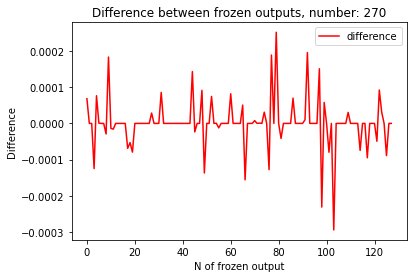

bias pc  0.0010648 -0.0002730 0.0010977 0.0027951 -0.0031253 0.0000500 0.0000240 0.0000270
bias stm 0.0010649 -0.0002730 0.0010977 0.0027951 -0.0031253 0.0000496 0.0000249 0.0000263

pre softmax pc  -87.7151072 90.7905210 203.9993640 118.3201952 -587.7572980 548.2712330 59.2191998 322.7103947
pre softmax stm -86.6840400 90.8190000 203.9979520 118.3201040 -587.7571840 546.8277120 64.5886400 317.7152640

softmax pc  0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 1.0000000 0.0000000 0.0000000
softmax stm 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 1.0000000 0.0000000 0.0000000


In [94]:
test_n = 270

print(f'labels is: {label_train[test_n]}')
myDebug.plot_frozenDifference(test_n, frozenOut_pc, frozenOut_stm)
print(f'bias pc  {bias_pc[test_n,0]:.7f} {bias_pc[test_n,1]:.7f} {bias_pc[test_n,2]:.7f} {bias_pc[test_n,3]:.7f} {bias_pc[test_n,4]:.7f} {bias_pc[test_n,5]:.7f} {bias_pc[test_n,6]:.7f} {bias_pc[test_n,7]:.7f}')
print(f'bias stm {bias_stm[test_n,0]:.7f} {bias_stm[test_n,1]:.7f} {bias_stm[test_n,2]:.7f} {bias_stm[test_n,3]:.7f} {bias_stm[test_n,4]:.7f} {bias_stm[test_n,5]:.7f} {bias_stm[test_n,6]:.7f} {bias_stm[test_n,7]:.7f}')

print()
print(f'pre softmax pc  {preSoftmax_pc[test_n,0]:.7f} {preSoftmax_pc[test_n,1]:.7f} {preSoftmax_pc[test_n,2]:.7f} {preSoftmax_pc[test_n,3]:.7f} {preSoftmax_pc[test_n,4]:.7f} {preSoftmax_pc[test_n,5]:.7f} {preSoftmax_pc[test_n,6]:.7f} {preSoftmax_pc[test_n,7]:.7f}')
print(f'pre softmax stm {preSoftmax_stm[test_n,0]:.7f} {preSoftmax_stm[test_n,1]:.7f} {preSoftmax_stm[test_n,2]:.7f} {preSoftmax_stm[test_n,3]:.7f} {preSoftmax_stm[test_n,4]:.7f} {preSoftmax_stm[test_n,5]:.7f} {preSoftmax_stm[test_n,6]:.7f} {preSoftmax_stm[test_n,7]:.7f}')
print()
print(f'softmax pc  {softmax_pc[test_n,0]:.7f} {softmax_pc[test_n,1]:.7f} {softmax_pc[test_n,2]:.7f} {softmax_pc[test_n,3]:.7f} {softmax_pc[test_n,4]:.7f} {softmax_pc[test_n,5]:.7f} {softmax_pc[test_n,6]:.7f} {softmax_pc[test_n,7]:.7f}')
print(f'softmax stm {softmax_stm[test_n,0]:.7f} {softmax_stm[test_n,1]:.7f} {softmax_stm[test_n,2]:.7f} {softmax_stm[test_n,3]:.7f} {softmax_stm[test_n,4]:.7f} {softmax_stm[test_n,5]:.7f} {softmax_stm[test_n,6]:.7f} {softmax_stm[test_n,7]:.7f}')

## Confront PRE SOFTMAX

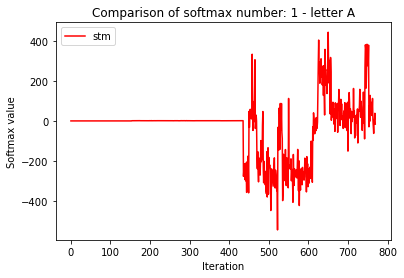

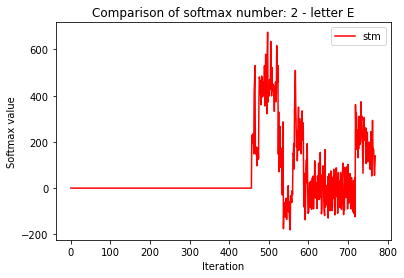

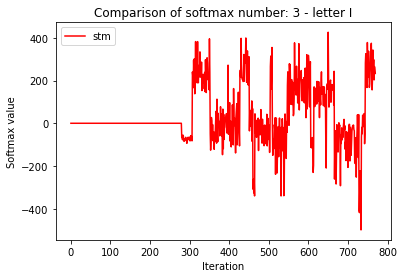

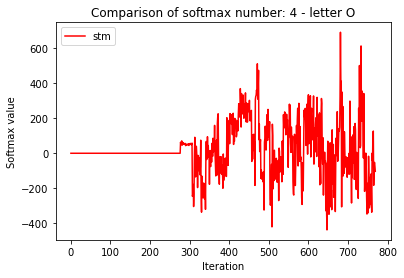

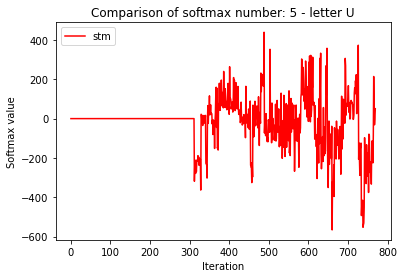

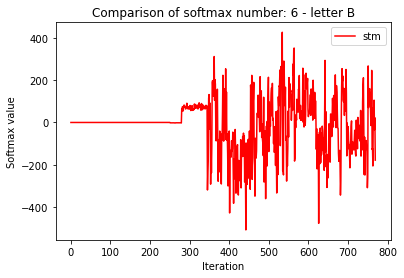

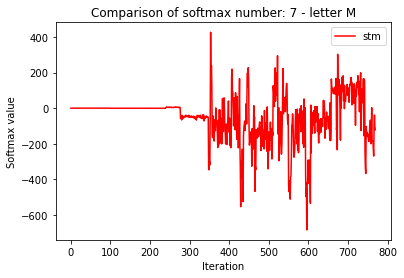

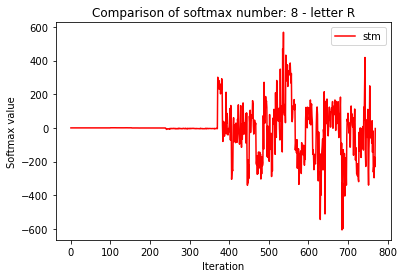

In [81]:
myDebug.debug_plotHistorySoftmax(0, preSoftmax_pc, preSoftmax_stm, Model_OL_all_mixed.label)
myDebug.debug_plotHistorySoftmax(1, preSoftmax_pc, preSoftmax_stm, Model_OL_all_mixed.label)
myDebug.debug_plotHistorySoftmax(2, preSoftmax_pc, preSoftmax_stm, Model_OL_all_mixed.label)
myDebug.debug_plotHistorySoftmax(3, preSoftmax_pc, preSoftmax_stm, Model_OL_all_mixed.label)
myDebug.debug_plotHistorySoftmax(4, preSoftmax_pc, preSoftmax_stm, Model_OL_all_mixed.label)
myDebug.debug_plotHistorySoftmax(5, preSoftmax_pc, preSoftmax_stm, Model_OL_all_mixed.label)
myDebug.debug_plotHistorySoftmax(6, preSoftmax_pc, preSoftmax_stm, Model_OL_all_mixed.label)
myDebug.debug_plotHistorySoftmax(7, preSoftmax_pc, preSoftmax_stm, Model_OL_all_mixed.label)

### Confront SOFTMAX

In [82]:
print(softmax_pc[5,:10])
print(softmax_stm[5,:10])

[0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 1. 0.]


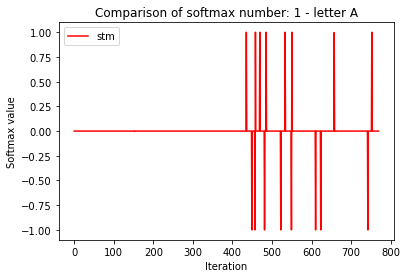

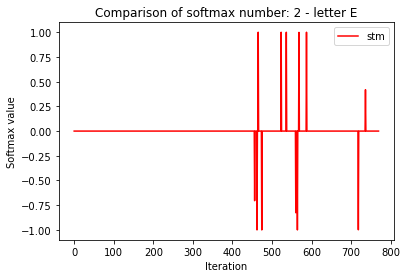

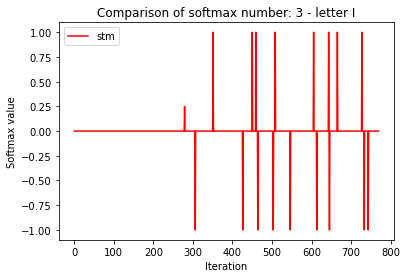

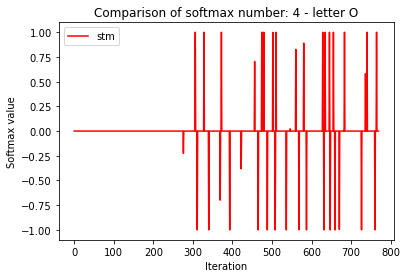

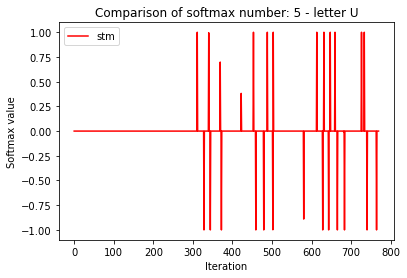

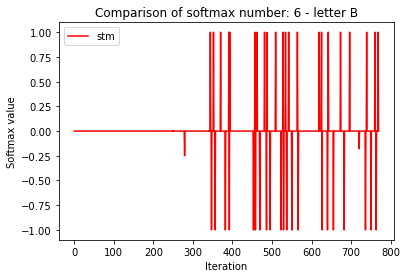

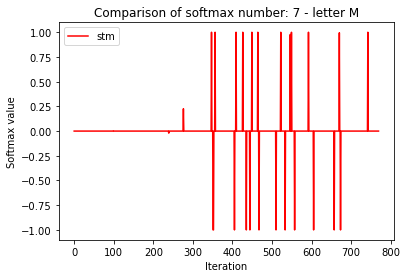

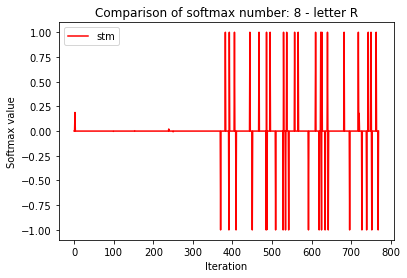

In [83]:
myDebug.debug_plotHistorySoftmax(0, softmax_pc, softmax_stm, Model_OL_all_mixed.label)
myDebug.debug_plotHistorySoftmax(1, softmax_pc, softmax_stm, Model_OL_all_mixed.label)
myDebug.debug_plotHistorySoftmax(2, softmax_pc, softmax_stm, Model_OL_all_mixed.label)
myDebug.debug_plotHistorySoftmax(3, softmax_pc, softmax_stm, Model_OL_all_mixed.label)
myDebug.debug_plotHistorySoftmax(4, softmax_pc, softmax_stm, Model_OL_all_mixed.label)
myDebug.debug_plotHistorySoftmax(5, softmax_pc, softmax_stm, Model_OL_all_mixed.label)
myDebug.debug_plotHistorySoftmax(6, softmax_pc, softmax_stm, Model_OL_all_mixed.label)
myDebug.debug_plotHistorySoftmax(7, softmax_pc, softmax_stm, Model_OL_all_mixed.label)

### Confront BIASES

In [84]:
n_prova = 700
myDebug.debug_confrontBias(n_prova, bias_stm, bias_pc, Model_OL_all_mixed.label) # max 771

print(f'correct label is: {label_train[n_prova]}')
for i in range (0, len(Model_OL_all_mixed.label)):
    print(f'    label: {Model_OL_all_mixed.label[i]}   pred: {softmax_pc[n_prova,i]:.11f}   pre soft: {preSoftmax_pc[n_prova,i]:.10f}' )

Iteration number 700
n bias     vowel
  0          A              0.00101476231       PC
                            0.00101508000       STM
                            0.00000031769       difference 

  1          E             -0.00026396120       PC
                           -0.00028736000       STM
                           -0.00002339880       difference 

  2          I              0.00106162722       PC
                            0.00104920700       STM
                           -0.00001242022       difference 

  3          O              0.00273718977       PC
                            0.00272968500       STM
                           -0.00000750477       difference 

  4          U             -0.00317607434       PC
                           -0.00313503100       STM
                            0.00004104334       difference 

  5          B              0.00013590285       PC
                            0.00009776000       STM
                           -0.000038142

In [85]:
print(bias_stm[100,5]-bias_pc[100,5])

-3.412062337993004e-10


The final values are:
          PC:0.00101476231
         STM:0.00101508000
  difference:-0.00000031769


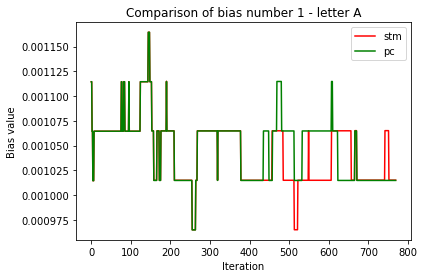

The final values are:
          PC:-0.00026389896
         STM:-0.00025828200
  difference:-0.00000561696


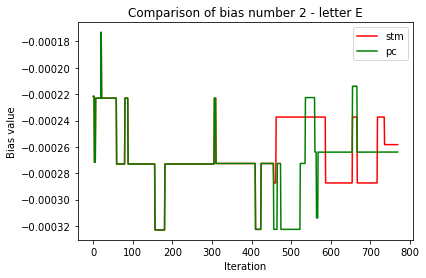

The final values are:
          PC:0.00106156497
         STM:0.00109920700
  difference:-0.00003764203


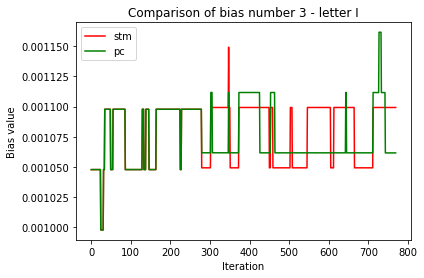

The final values are:
          PC:0.00278718977
         STM:0.00275060700
  difference:0.00003658277


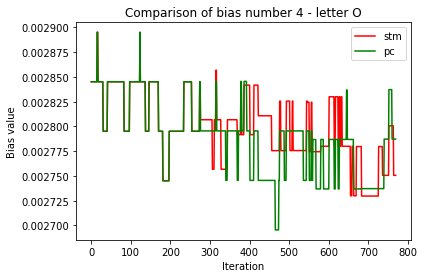

The final values are:
          PC:-0.00317607434
         STM:-0.00313503100
  difference:-0.00004104334


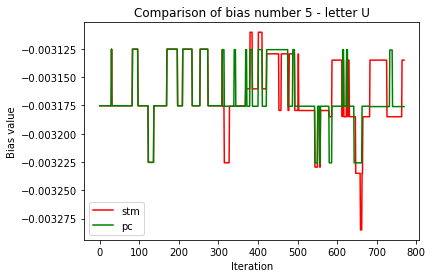

The final values are:
          PC:0.00012695154
         STM:0.00009776000
  difference:0.00002919154


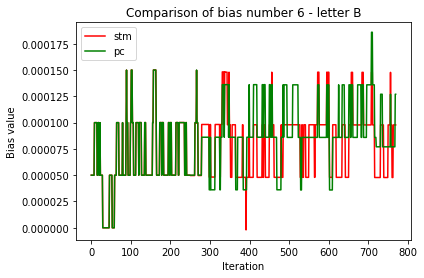

The final values are:
          PC:0.00007370288
         STM:0.00006470800
  difference:0.00000899488


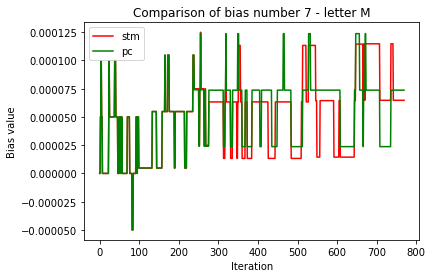

The final values are:
          PC:0.00003614453
         STM:0.00002628800
  difference:0.00000985653


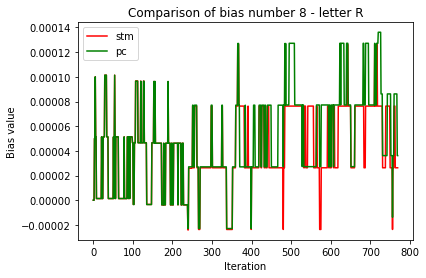

In [86]:
myDebug.debug_plotHistoryBias(0, bias_stm, bias_pc, Model_OL_all_mixed.label)
myDebug.debug_plotHistoryBias(1, bias_stm, bias_pc, Model_OL_all_mixed.label)
myDebug.debug_plotHistoryBias(2, bias_stm, bias_pc, Model_OL_all_mixed.label)
myDebug.debug_plotHistoryBias(3, bias_stm, bias_pc, Model_OL_all_mixed.label)
myDebug.debug_plotHistoryBias(4, bias_stm, bias_pc, Model_OL_all_mixed.label)
myDebug.debug_plotHistoryBias(5, bias_stm, bias_pc, Model_OL_all_mixed.label)
myDebug.debug_plotHistoryBias(6, bias_stm, bias_pc, Model_OL_all_mixed.label)
myDebug.debug_plotHistoryBias(7, bias_stm, bias_pc, Model_OL_all_mixed.label)

### Confront weights

In [40]:
weight_num  = list(range(60,70))

In [41]:
n_prova = 100

myDebug.debug_confrontWeights(n_prova, weight_stm, weight_pc, weight_num, selected_w)


Iteration number 100
n weight
  775             -0.03761518551       PC
                 -0.03761520800       STM
                 -0.00000002249       difference 

  809             -0.04108816273       PC
                 -0.04108816400       STM
                 -0.00000000127       difference 

  798              0.00210829288       PC
                  0.00210829700       STM
                  0.00000000412       difference 

  853             -0.00000000000       PC
                 0.00000000000       STM
                  0.00000000000       difference 

  804              0.03323957398       PC
                  0.03323956200       STM
                 -0.00000001198       difference 

  840             -0.02341322712       PC
                 -0.02345438200       STM
                 -0.00004115488       difference 

  828              0.01697259070       PC
                  0.01688940200       STM
                 -0.00008318870       difference 

  788             0.000000

The final values are:
             PC:-0.14094029599
            STM:-0.15529953600
  difference:0.01435924001


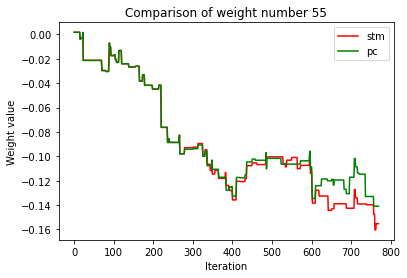

In [42]:
myDebug.debug_plotHistoryWeight(55, weight_stm, weight_pc)

### FROZEN OUTPUT

In [43]:
max_val = 0
itr_1 = 0
itr_2 = 0
for i in range(0,770):
    diff = frozenOut_pc[i,:] - frozenOut_stm[i,:]
    if(max(diff)>max_val):
        max_val = max(diff)
        itr_1 = i
        itr_2 = np.argmax(diff)
        
print(f'The max values of difference of all {frozenOut_stm.shape[0]} iteration is: {S_BOLD}{max_val:.11f}{E_BOLD}')
print(f'The max difference is found at the iteration number: {S_BOLD}{itr_1}{E_BOLD}')
print(f'At the position in the frozen output: {S_BOLD}{itr_2}/128{E_BOLD}')

The max values of difference of all 770 iteration is: 0.00036759375
The max difference is found at the iteration number: 290
At the position in the frozen output: 86/128


The max difference is 0.00026315234379126196


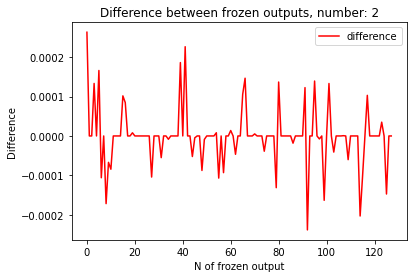

In [44]:
myDebug.plot_frozenDifference(2, frozenOut_pc, frozenOut_stm)

In [45]:
new_container = np.zeros(frozenOut_stm.shape)

for j in range(0, frozenOut_stm.shape[0]):
    for i in range(0, frozenOut_stm.shape[1]):
        max_val = max(frozenOut_pc[j,i], frozenOut_pc[j,i])
        if(max_val != 0):
            diff = frozenOut_pc[j,i]-frozenOut_stm[j,i]
            new_container[j,i] = diff/max_val
          
        
max_val =0
for j in range(0, frozenOut_stm.shape[0]):
    if(max_val < max(new_container[i,:])):
        max_val = max(new_container[i,:])
        
print(f'The max percentage error committed between stm and laptop is of: {max_val:.11f}')
print(f'Percentage at position, 237, 79 is {new_container[237,79]}')

The max percentage error committed between stm and laptop is of: 0.00000181691
Percentage at position, 237, 79 is 3.3620642637047445e-07


## END DEBUG *********************************************

### Train with OL + mini batch

In [46]:
if(OL_mini==1):
    Model_OL_mini = Custom_Layer(model)
    Model_OL_mini.title = 'OL + mini batch'
    Model_OL_mini.filename = 'OL_batches'
    Model_OL_mini.l_rate = 0.0001

    trainOneEpoch_OL_miniBatch(Model_OL_mini, data_train, label_train, batch_size_OL)

### Train with LWF

In [ ]:
if(LWF==1):
    Model_LWF_1 = Custom_Layer(model)
    Model_LWF_1.title = 'LWF'
    Model_LWF_1.filename = 'LWF'   
    Model_LWF_1.l_rate = 0.0017 #0.001

    trainOneEpochOL_LWF(Model_LWF_1, data_train, label_train)   

### Train LWF + mini batches

In [ ]:
if(LWF_mini==1):
    Model_LWF_2 = Custom_Layer(model)
    Model_LWF_2.title = 'LWF + mini batch'
    Model_LWF_2.filename = 'LWF_batches'
    Model_LWF_2.l_rate = 0.000001

    trainOneEpochOL_LWF_v2(Model_LWF_2, data_train, label_train, batch_size_OL)

### Train with OL v2 

In [ ]:
if(OL_v2==1):
    Model_OL_v2 = Custom_Layer(model)
    Model_OL_v2.title = 'OL v2' 
    Model_OL_v2.filename = 'OL_v2'
    Model_OL_v2.l_rate = 0.00005

    trainOneEpoch_OL_v2(Model_OL_v2, data_train, label_train)

### Train with OL v2 + mini batch

In [ ]:
if(OL_v2_mini==1):
    Model_OL_v2_miniBatch = Custom_Layer(model)
    Model_OL_v2_miniBatch.title = 'OL v2 + mini batch'
    Model_OL_v2_miniBatch.filename = 'OL_v2_batches'
    Model_OL_v2_miniBatch.l_rate = 0.001

    trainOneEpoch_OL_v2_miniBatch(Model_OL_v2_miniBatch, data_train, label_train, batch_size_OL)

### Train with CWR

In [ ]:
if(CWR==1):
    Model_CWR = Custom_Layer(model) 
    Model_CWR.title = 'CWR'
    Model_CWR.filename = 'CWR'
    Model_CWR.l_rate = 0.00005

    trainOneEpoch_CWR(Model_CWR, data_train, label_train, batch_size_OL)

# SIMULATION PLOTS

### KERAS model

In [ ]:
if(KERAS==1):
    myTest.test_OLlayer(Model_KERAS, data_test, label_test)
    myBar.plot_barChart(Model_KERAS)   
    myMatrix.plot_confMatrix(Model_KERAS)
    myTable.table_params(Model_KERAS)

### Only vowels

In [ ]:
if(OL_vowels==1):
    myTest.test_OLlayer(Model_OL_vowels, data_test, label_test)
    myBar.plot_barChart(Model_OL_vowels)
    myMatrix.plot_confMatrix(Model_OL_vowels)
    myTable.table_params(Model_OL_vowels)

### OL

In [ ]:
if(OL==1):
    myTest.test_OLlayer(Model_OL_all_mixed, data_test, label_test)
    myBar.plot_barChart(Model_OL_all_mixed)
    myMatrix.plot_confMatrix(Model_OL_all_mixed)
    myTable.table_params(Model_OL_all_mixed)

### OL + mini batch

In [ ]:
if(OL_mini==1):
    myTest.test_OLlayer(Model_OL_mini, data_test, label_test)
    myBar.plot_barChart(Model_OL_mini)
    myMatrix.plot_confMatrix(Model_OL_mini)
    myTable.table_params(Model_OL_mini)

### LWF

In [ ]:
if(LWF==1):
    myTest.test_OLlayer(Model_LWF_1, data_test, label_test)
    myBar.plot_barChart(Model_LWF_1)
    myMatrix.plot_confMatrix(Model_LWF_1)
    myTable.table_params(Model_LWF_1)

### LWF + mini batch

In [ ]:
if(LWF_mini==1):
    myTest.test_OLlayer(Model_LWF_2, data_test, label_test)
    myBar.plot_barChart(Model_LWF_2)
    myMatrix.plot_confMatrix(Model_LWF_2)
    myTable.table_params(Model_LWF_2)

### OL v2

In [ ]:
if(OL_v2==1):
    myTest.test_OLlayer(Model_OL_v2, data_test, label_test)
    myBar.plot_barChart(Model_OL_v2)
    myMatrix.plot_confMatrix(Model_OL_v2)
    myTable.table_params(Model_OL_v2)

### OL v2 + mini batch

In [ ]:
if(OL_v2_mini==1):
    myTest.test_OLlayer(Model_OL_v2_miniBatch, data_test, label_test)
    myBar.plot_barChart(Model_OL_v2_miniBatch)
    myMatrix.plot_confMatrix(Model_OL_v2_miniBatch)
    myTable.table_params(Model_OL_v2_miniBatch)

### CWR

In [ ]:
if(CWR==1):
    myTest.test_OLlayer(Model_CWR, data_test, label_test)
    myBar.plot_barChart(Model_CWR)
    myMatrix.plot_confMatrix(Model_CWR)
    myTable.table_params(Model_CWR)

## All bar plots together

In [ ]:
myBar.plot_barChart_All()

The following plot is a recap of all the methods trained. Note that it will be displayed only if all the training have been performed in this runtime. 
The table contains some additiona information and not only the accuracy.

In [ ]:
if(KERAS and OL_vowels and OL and OL_mini and LWF and LWF_mini and OL_v2 and OL_v2_mini and CWR):
    
    myTable.table_simulationResult(Model_KERAS, Model_OL_vowels, Model_OL_all_mixed, Model_OL_mini, 
               Model_LWF_1, Model_LWF_2, Model_OL_v2, Model_OL_v2_miniBatch, Model_CWR)  

# GENERAL PLOTS

The block below is used for storing the result of the simulation formermed in this runtime. This is used for another plotting function that will display the average accuracy of each method across multiple runtimes.

In [ ]:
# Write down in txt files all the results across 10 or so simulations          
WRITE_SIMU_RES = 0
                
if(WRITE_SIMU_RES==1):
    myWrite.save_simulationResult('Keras',     Model_KERAS)
    myWrite.save_simulationResult('OL_vowels', Model_OL_vowels)
    myWrite.save_simulationResult('OL',        Model_OL_all_mixed)
    myWrite.save_simulationResult('OL_mini',   Model_OL_mini)
    myWrite.save_simulationResult('LWF',       Model_LWF_1)
    myWrite.save_simulationResult('LWF_mini',  Model_LWF_2)
    myWrite.save_simulationResult('OL_v2',     Model_OL_v2)
    myWrite.save_simulationResult('OL_v2_min', Model_OL_v2_miniBatch)
    myWrite.save_simulationResult('CWR',       Model_CWR)

In [ ]:
# Plot the average accuracy over several runtimes

#myBar.plot_barChart_SimuRes(1)

The block below plots some pie charts that shows how the dataset are composed.

In [ ]:
ENABLE_PLOTS = 0
if(ENABLE_PLOTS==1):
    
    
    vowels_data_tf, vowels_label_tf = myParse.loadDataFromTxt('vowels_TF')
    TF_data_train, _, TF_data_test, _ = myParse.parseTrainTest(vowels_data_tf, vowels_label_tf, 0.7)


    # Plot of the pie chart of the dataset TF e OL
    dataset_shapes = np.zeros(8)
    label_vow = ['A','E','I','O','U']

    for i in range(0,vowels_data.shape[0]):
        for j in range(0,len(label_vow)):
            if(label_vow[j] == vowels_label[i]):
                dataset_shapes[j] += 1
                break
    for i in range(0,vowels_data_tf.shape[0]):
        for j in range(0,len(label_vow)):
            if(label_vow[j] == vowels_label_tf[i]):
                dataset_shapes[j] += 1
                break

    dataset_shapes[5] = B_data.shape[0]
    dataset_shapes[6] = R_data.shape[0]
    dataset_shapes[7] = M_data.shape[0]
    myPie.plot_pieChart_datasetAll(dataset_shapes)

    
    
    
    

    dataset_shapes = np.zeros([8])
    dataset_shapes[0] = OL_data_train_vow.shape[0]
    dataset_shapes[1] = OL_data_test_vow.shape[0]
    dataset_shapes[2] = B_train_data.shape[0]
    dataset_shapes[3] = B_test_data.shape[0]
    dataset_shapes[4] = R_train_data.shape[0]
    dataset_shapes[5] = R_test_data.shape[0]
    dataset_shapes[6] = M_train_data.shape[0]
    dataset_shapes[7] = M_test_data.shape[0]
    # Plot of the pie chart of the dataset OL
    myPie.plot_pieChart_DatasetOL(dataset_shapes)

    # Plot of the pie chart of the dataset TF
    myPie.plot_pieChart_DatasetTF(TF_data_train.shape[0],TF_data_test.shape[0])